In [70]:
### Plot delay period decoding results

In [9]:
import csv
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import adjust_box_widths
from matplotlib.patches import PathPatch

In [10]:
#current_palette = sns.color_palette()
#sns.palplot(current_palette)

#8 = Jitter classification results (panels A and B)
#9 = Gernalization (Train on Jitter time, predict on detection period; panels C and D)

In [11]:
sheet_1 = 7
sheet_2 = 8

In [12]:
dirpath = os.getcwd()

file = os.path.join(dirpath, 'Overview.xlsx') #.xlsx')
xl = pd.ExcelFile(file)

df = xl.parse(sheet_1)
df_con_1 = df.loc[df['Region']=="Contra-lateral"]
df_ips_1 = df.loc[df['Region']=="Ipsi-lateral"]

df = xl.parse(sheet_2)
df_con_2 = df.loc[df['Region']=="Contra-lateral"]
df_ips_2 = df.loc[df['Region']=="Ipsi-lateral"]


/Users/pkf/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/pkf/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
def significance(axis, tick_value, data_ratio, max_value, text='***',offset=0.13,fontsize=20):
    hanbun_min = tick_value - data_ratio/2
    hanbun_max = tick_value + data_ratio/2
    axis.text(tick_value,max_value+0.1385,text,bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':0.9},
          ha='center', va='center',fontsize=fontsize)
    axis.plot([hanbun_min,hanbun_max],[max_value+offset-0.003,max_value+offset-0.003],'k',linewidth=1)
    axis.plot([hanbun_min,hanbun_min],[max_value+offset-0.003,max_value+offset-0.01],'k',linewidth=1)
    axis.plot([hanbun_max,hanbun_max],[max_value+offset-0.003,max_value+offset-0.01],'k',linewidth=1)
    
def draw_line(axis,y1,y2,x1=0,x2=1):
    axis.plot([x1,x2],[y1,y2],color='lightgrey',ls='-',linewidth=0.7)

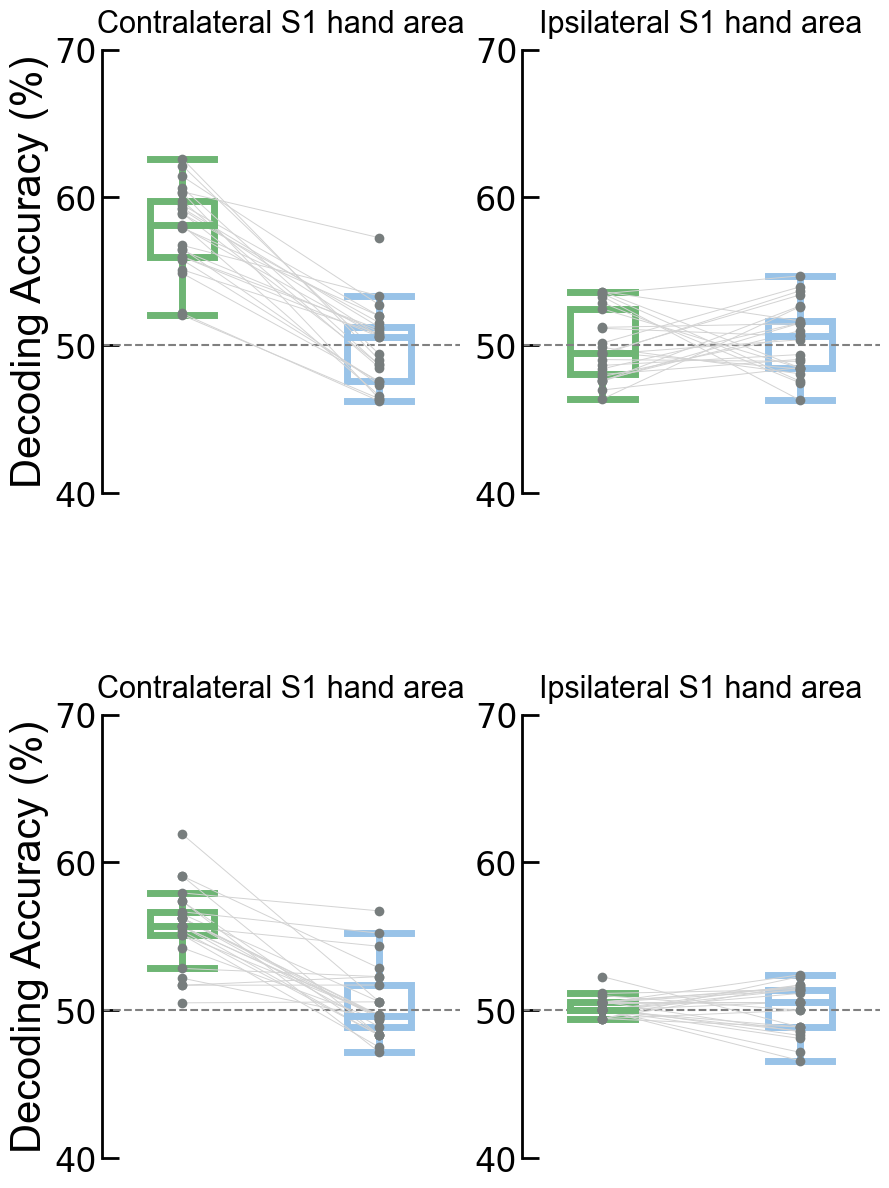

In [29]:

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'mediumblue','alpha': 1},
    'medianprops':{'color':'cornflowerblue','alpha': 1},
    'whiskerprops':{'color':'cornflowerblue','alpha': 1},
    'capprops':{'color':'cornflowerblue','alpha': 1}
}

fig, ax = plt.subplots(2,2)
fig.set_size_inches(9, 12)
#colors for the dots
colors = ["#777d7d", "#777d7d"]

colors_box = ["#4cad83", "#b8e6f5"]
colors_box = ["#6eb574",'#99c3e8' ]


data = [
    [df_con_1,df_ips_1],
    [df_con_2,df_ips_2]
]

signif_data = [
    [[0.52,"****"],[0.44,"n.s."]],
    [[0.51,"****"],[0.43,"n.s."]]
]

label_data = [
    [[0.44,0.66],[0.44,0.61]],
    [[0.46,0.65],[0.46,0.59]],
]

title = [
    ["Decoding of finger cue during delay period", "Decoding delay period"],
    ["Decoder generalization to stimulation events", "Decoder generalization"]
]

title = [
    ['',''],
    ['','']
]

subtitle = [
    ["Contralateral S1 hand area", "Ipsilateral S1 hand area"],
    ["Contralateral S1 hand area", "Ipsilateral S1 hand area"]
]

axislabel = [
    ['Decoding Accuracy (%)',''],
    ['Decoding Accuracy (%)','']
]


#for dot size, change the size parameter
for idx,row in enumerate(ax):
    for idj,axis in enumerate(row):
        df_con = data[idx][idj]
        boxplot = sns.boxplot(
            data=df_con,
            x='Condition',
            y='Accuracy',
            fliersize=0,
            palette=colors_box,
            ax=axis,
            width=0.65,
            linewidth=5,
            **PROPS
        )
        
        #CHANGE BOXPLOT STYLE

        box_patches = [patch for patch in boxplot.patches if type(patch) == matplotlib.patches.PathPatch]
        if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
            box_patches = boxplot.artists
    
        num_patches = len(box_patches)
        lines_per_boxplot = len(boxplot.lines) // num_patches

        for i, patch in enumerate(box_patches):
    
            col = colors_box[i%2]
            patch.set_edgecolor(col)
            patch.set_facecolor('None')
    
            for line in boxplot.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
                line.set_color(col)
        
        
        #END CHANGE BOXPLOT STYLE
        
        axis = sns.stripplot(
            data=df_con,
            x='Condition',
            y='Accuracy',
            jitter=0,
            color=colors[0],
        #size parameter
            size=7,
            dodge=True,
            ax=axis,
        )
        axis.axhline(0.5,linewidth=1.5, color='grey',ls='--')

        n = int(len(df_con)/2)
        for i in range(0,n):
            draw_line(axis,df_con.iloc[i]["Accuracy"],df_con.iloc[i+n]["Accuracy"])
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['left'].set_linewidth(2)

        #significance(axis,0.5,1,signif_data[idx][idj][0],text=signif_data[idx][idj][1],fontsize=15)
        
        label_d = label_data[idx][idj]
        axis.set_yticks(np.arange(0.4,0.75,step=0.1))
        axis.set_yticklabels(np.arange(40,75,step=10))
        #axis.set_ylabel("Decoding accuracy (%)",fontsize=30,fontname='Arial')
        axis.set_ylabel(axislabel[idx][idj],fontsize=30,fontname='Arial')
        axis.set_xlabel("",fontsize=20)
        axis.set_xticklabels('')
        axis.set_title(subtitle[idx][idj], fontsize = 22,fontname='Arial',y=1.02)
        
        ymax = axis.get_ylim()[1]
        ystep = (ymax + abs(axis.get_ylim()[0])) / 20
        axis.text(s=title[idx][idj], y=ymax + ystep, x=0.5, ha='center', fontsize = 18,fontname='Arial')
        
        plt.rc('ytick', labelsize=10)
        plt.rc('xtick', labelsize=15)
        axis.tick_params(bottom = False)
        axis.tick_params(axis='y', which='major', direction='in',length=12, labelsize=24, width=2)
        
plt.tight_layout()
fig.tight_layout()

adjust_box_widths(fig, 0.5)

plt.subplots_adjust(hspace=0.5)
fig.savefig("Fig5AB.jpg",dpi=500)
plt.savefig('Fig5AB.eps', format='eps')